In [23]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)

In [24]:
%run 'cross_validation/functions.ipynb'

In [25]:
pico_df, labels_picoo, features_pico, feature_list_pico = preprocess_single_population(covari_pico, drop, None)
train_features, test_features, train_labels, test_labels = k_fold(features_pico, labels_pico, 8)

In [26]:
hyperparameters = {'n_estimators': 160, 'max_depth': 12, 'max_features': 'sqrt'}

In [27]:
predict_cruise(hyperparameters, 'pico')

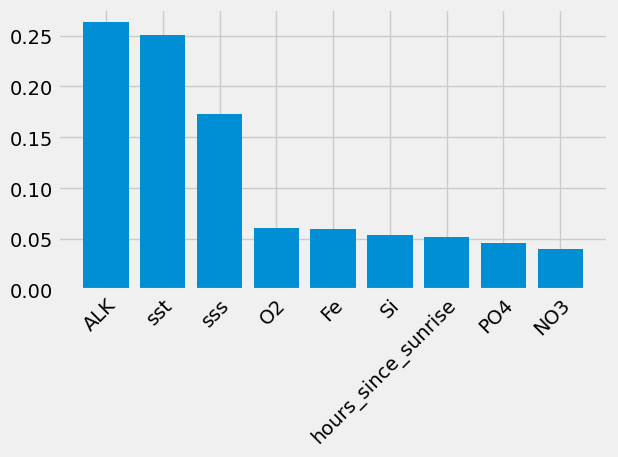

In [28]:
feature_importance('pico',feature_list_pico)

[ 0.00782637 -0.06257565  0.02691214  0.08472192  0.01019008  0.00719981
 -0.04406206  0.00256853  0.02133611]
[ 0.13684422  0.04167765  0.05460468  0.02097974 -0.05451185  0.01398908
 -0.09789122  0.0373024   0.04892307]
[ 1.84871830e+00  3.74757613e-03  3.90128275e-01  1.04211121e-01
 -6.32499487e-05 -9.52614485e-03  1.54700115e-02 -8.37687662e-03
  2.41516202e-02]
[0.17632698 0.02010849 0.08148225 0.08911915 0.07448889 0.05856107
 0.04961423 0.08816055 0.02103094]
[ 0.01305229  0.02674331  0.17712826  0.36250236  0.6153305   0.26379377
  0.41074368  0.34339677 -0.04286472]
[ 0.03780171  0.01104092 -0.01018563  0.05711027  0.06344975  0.03716402
  0.07464242  0.04562957  0.00965506]
[-0.00227282  0.01119314  0.11634673 -0.00977772 -0.00217406  0.00578873
 -0.00514086 -0.00859716  0.01499312]
[ 0.54124709  0.64628984  0.65761989 -0.04188096 -0.03416026 -0.04702014
 -0.04656827 -0.04609554  0.01649771]


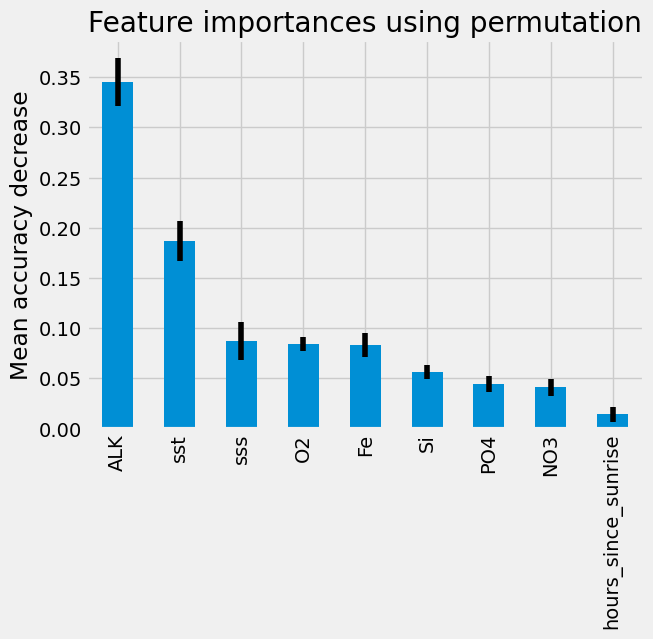

In [29]:
permutation_importances('pico', test_features, test_labels, feature_list_pico)

In [30]:
predictions, maes, rmses, old_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pico')

In [31]:
drop = True
pico_df, labels_pico, features_pico, feature_list_pico = preprocess_single_population(covari_pico, drop, ['NO3', 'Si', 'PO4', 'hours_since_sunrise'])
train_features, test_features, train_labels, test_labels = k_fold(features_pico, labels_pico, 8)
predict_cruise(hyperparameters, 'pico')

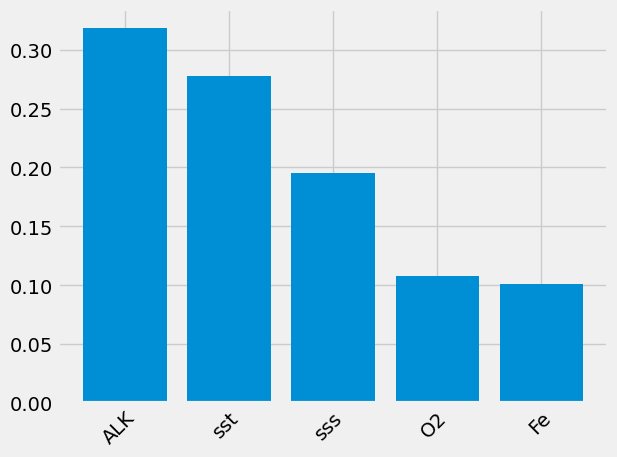

In [32]:
feature_importance('pico',feature_list_pico)

In [33]:
predictions, maes, rmses, more_nutrients_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pico')

In [34]:
list_of_rmse = {'original': old_rmse}
list_of_rmse['max'] = more_nutrients_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['max'])/sorted_rmse['original'] * 100, '%' )

{'max': 2.2219408728245993, 'original': 2.297109909111171}
the percent improvement is: 3.2723308531483033 %


In [35]:
pico_df, labels_pico, features_pico, feature_list_pico = preprocess_single_population(covari_pico, drop, ['hours_since_sunrise'])
train_features, test_features, train_labels, test_labels = k_fold(features_pico, labels_pico, 8)
predict_cruise(hyperparameters, 'pico')

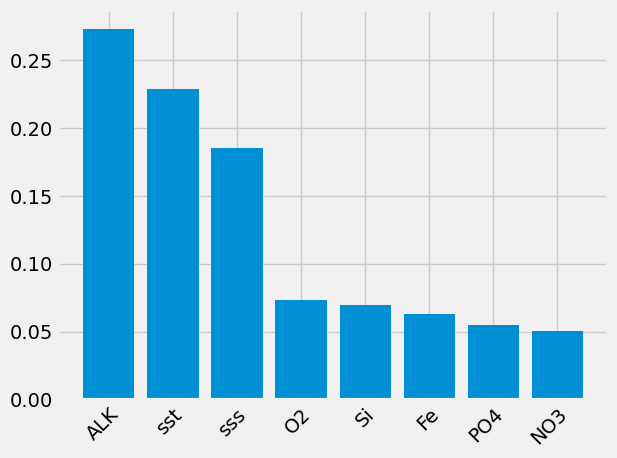

In [36]:
feature_importance('pico',feature_list_pico)

In [37]:
predictions, maes, rmses, sunrise_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pico')

In [38]:
list_of_rmse['sunrise'] = sunrise_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['sunrise'])/sorted_rmse['original'] * 100, '%' )

{'max': 2.2219408728245993, 'original': 2.297109909111171, 'sunrise': 2.3244564222920916}
the percent improvement is: -1.190474738385583 %


In [39]:
pico_df, labels_picoo, features_pico, feature_list_pico = preprocess_single_population(covari_pico, False, None)
train_features, test_features, train_labels, test_labels = k_fold(features_pico, labels_pico, 8)

In [40]:
hyperparameters={'n_estimators': 120, 'max_depth': 12, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'pico')

In [41]:
hyperparameters={'n_estimators': 40, 'max_depth': 5, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'pico')

In [42]:
hyperparameters={'n_estimators': 10, 'max_depth': 40, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'pico')

In [43]:
hyperparameters={'n_estimators': 180, 'max_depth': 18, 'max_features': 'sqrt'}
predict_cruise(hyperparameters, 'pico')

In [44]:
drop = False
pico_df, labels_pico, features_pico, feature_list_pico = preprocess_single_population(covari_pico, drop, None)

param_grid = {
        'n_estimators': [60, 80, 120, 160],
        'max_depth': [10, 12, 16, 20],
        'max_features': ['sqrt']
    }

metrics = ['neg_root_mean_squared_error', 'r2']
# neg root mean squared error is the same as root mean squared error, but since the function chooses the best score we need to use the negative 

grid_search_hyperparams(param_grid, metrics, features_pico, labels_pico)

Fitting 8 folds for each of 16 candidates, totalling 128 fits
Best hyperparameters for  neg_root_mean_squared_error are: {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 60}
Fitting 8 folds for each of 16 candidates, totalling 128 fits
Best hyperparameters for  r2 are: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 120}
